## DSC650-T301 Big Data (2235-1)
## 4/18/2023
## Joshua Greenert

## 6.1


In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [24]:
# Display the architecture of the convnet so far.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [25]:
# Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [26]:
# View the summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [27]:
# Training the convnet on MNIST images
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import optimizers

# set an SGD optimizer with a static learning rate.
# opt = optimizers.SGD(learning_rate=0.01)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1644 - acc: 0.9482
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0461 - acc: 0.9856
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0320 - acc: 0.9901
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0247 - acc: 0.9926
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0195 - acc: 0.9941


In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0275 - acc: 0.9914


0.9914000034332275

In [29]:
from sklearn.model_selection import train_test_split

# Create a train-test split.
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

# Create a history object to use for plotting.
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0153 - acc: 0.9953 - val_loss: 0.0152 - val_acc: 0.9952
Epoch 2/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0122 - acc: 0.9963 - val_loss: 0.0169 - val_acc: 0.9947
Epoch 3/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0167 - val_acc: 0.9946
Epoch 4/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0283 - val_acc: 0.9933
Epoch 5/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0067 - acc: 0.9981 - val_loss: 0.0335 - val_acc: 0.9927


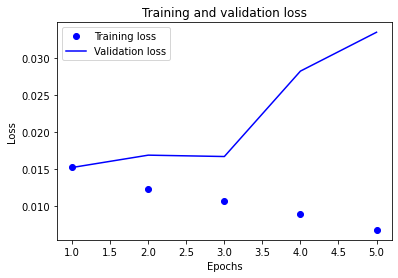

In [30]:
# Create a plot to view the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

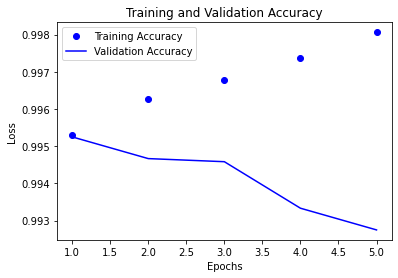

In [33]:
# Plot the train data and validation accuracy.
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
# Save the results
import os
import numpy as np

# Use the model to make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Save the model to the results folder
model.save('results/model-6-1.h5')
plt.savefig('results/validation-6-1.png')
np.savetxt('results/predictions-6-1.txt', predicted_labels, fmt='%d')
np.savetxt('results/metrics-6-1.txt', np.column_stack((loss_values, acc_values, val_loss_values, val_acc_values)), fmt='%f')

313/313 [==============================] - 1s 4ms/step


<Figure size 432x288 with 0 Axes>

## 6.2.a

In [37]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape == (50000, 32, 32, 3))
print(x_test.shape == (10000, 32, 32, 3))
print(y_train.shape == (50000, 1))
print(y_test.shape == (10000, 1))

# Update y values to categorical.
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train / 255
x_test = x_test / 255

170498071/170498071 [==============================] - 24s 0us/step
True
True
True
True


In [38]:
# Set up the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [40]:
# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])

In [41]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_datagen.fit(x_train)
test_datagen.fit(x_test)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=64)

In [42]:
history = model.fit(train_generator, steps_per_epoch=64, epochs=120, validation_data=(validation_generator), validation_steps=64)

Epoch 1/120
64/64 [==============================] - 11s 154ms/step - loss: 2.2837 - acc: 0.1895 - val_loss: 1.9515 - val_acc: 0.3257
Epoch 2/120
64/64 [==============================] - 10s 153ms/step - loss: 1.8973 - acc: 0.3306 - val_loss: 1.8593 - val_acc: 0.3015
Epoch 3/120
64/64 [==============================] - 10s 150ms/step - loss: 1.6945 - acc: 0.3777 - val_loss: 1.6732 - val_acc: 0.3889
Epoch 4/120
64/64 [==============================] - 10s 149ms/step - loss: 1.5987 - acc: 0.4109 - val_loss: 2.1765 - val_acc: 0.3167
Epoch 5/120
64/64 [==============================] - 10s 156ms/step - loss: 1.5276 - acc: 0.4546 - val_loss: 1.4524 - val_acc: 0.4719
Epoch 6/120
64/64 [==============================] - 10s 151ms/step - loss: 1.4368 - acc: 0.4758 - val_loss: 1.4061 - val_acc: 0.5034
Epoch 7/120
64/64 [==============================] - 10s 152ms/step - loss: 1.3680 - acc: 0.5127 - val_loss: 1.3567 - val_acc: 0.5269
Epoch 8/120
64/64 [==============================] - 10s 153ms

Epoch 62/120
64/64 [==============================] - 10s 154ms/step - loss: 0.4066 - acc: 0.8662 - val_loss: 0.8689 - val_acc: 0.7378
Epoch 63/120
64/64 [==============================] - 10s 157ms/step - loss: 0.3699 - acc: 0.8730 - val_loss: 0.8052 - val_acc: 0.7739
Epoch 64/120
64/64 [==============================] - 10s 156ms/step - loss: 0.3867 - acc: 0.8738 - val_loss: 0.9079 - val_acc: 0.7590
Epoch 65/120
64/64 [==============================] - 10s 155ms/step - loss: 0.3718 - acc: 0.8760 - val_loss: 0.7583 - val_acc: 0.7695
Epoch 66/120
64/64 [==============================] - 10s 162ms/step - loss: 0.3929 - acc: 0.8689 - val_loss: 0.8614 - val_acc: 0.7502
Epoch 67/120
64/64 [==============================] - 10s 160ms/step - loss: 0.3528 - acc: 0.8809 - val_loss: 0.8858 - val_acc: 0.7527
Epoch 68/120
64/64 [==============================] - 10s 158ms/step - loss: 0.3462 - acc: 0.8821 - val_loss: 0.7771 - val_acc: 0.7656
Epoch 69/120
64/64 [==============================] - 1

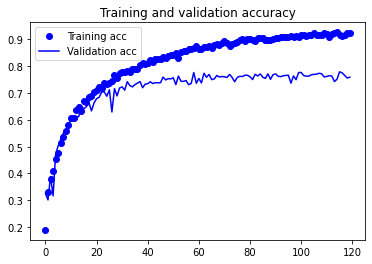

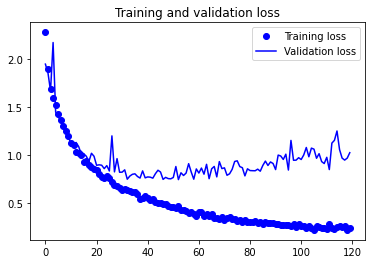

In [43]:
# Display the curves of lass and accuracy during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
# Use the model to make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Save the model to the results folder
model.save('results/model-6-2-a.h5')
plt.savefig('results/validation-6-2-a.png')
np.savetxt('results/predictions-6-2-a.txt', predicted_labels, fmt='%d')
np.savetxt('results/metrics-6-2-a.txt', np.column_stack((loss_values, acc_values, val_loss_values, val_acc_values)), fmt='%f')

313/313 [==============================] - 6s 20ms/step


<Figure size 432x288 with 0 Axes>

## 6.2.b

In [45]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape == (50000, 32, 32, 3))
print(x_test.shape == (10000, 32, 32, 3))
print(y_train.shape == (50000, 1))
print(y_test.shape == (10000, 1))

# Update y values to categorical.
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train / 255
x_test = x_test / 255

True
True
True
True


In [46]:
# Set up the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)       

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [49]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)
test_datagen.fit(x_test)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=64)

In [50]:
history = model.fit(train_generator, steps_per_epoch=64, epochs=120, validation_data=(validation_generator), validation_steps=64)

Epoch 1/120
64/64 [==============================] - 14s 197ms/step - loss: 2.6795 - acc: 0.1140 - val_loss: 2.3342 - val_acc: 0.0972
Epoch 2/120
64/64 [==============================] - 12s 192ms/step - loss: 2.2685 - acc: 0.1357 - val_loss: 2.3555 - val_acc: 0.1060
Epoch 3/120
64/64 [==============================] - 12s 191ms/step - loss: 2.2394 - acc: 0.1548 - val_loss: 2.5423 - val_acc: 0.1016
Epoch 4/120
64/64 [==============================] - 13s 197ms/step - loss: 2.1930 - acc: 0.1614 - val_loss: 2.7448 - val_acc: 0.0947
Epoch 5/120
64/64 [==============================] - 13s 199ms/step - loss: 2.2122 - acc: 0.1692 - val_loss: 3.0198 - val_acc: 0.0955
Epoch 6/120
64/64 [==============================] - 13s 202ms/step - loss: 2.1620 - acc: 0.1814 - val_loss: 2.9739 - val_acc: 0.0955
Epoch 7/120
64/64 [==============================] - 12s 195ms/step - loss: 2.1528 - acc: 0.1914 - val_loss: 2.7050 - val_acc: 0.1060
Epoch 8/120
64/64 [==============================] - 13s 203ms

64/64 [==============================] - 12s 186ms/step - loss: 1.5785 - acc: 0.4487 - val_loss: 45.2798 - val_acc: 0.1040
Epoch 62/120
64/64 [==============================] - 12s 186ms/step - loss: 1.6174 - acc: 0.4258 - val_loss: 24.6839 - val_acc: 0.1016
Epoch 63/120
64/64 [==============================] - 12s 181ms/step - loss: 1.5860 - acc: 0.4397 - val_loss: 35.6904 - val_acc: 0.1028
Epoch 64/120
64/64 [==============================] - 12s 183ms/step - loss: 1.6031 - acc: 0.4465 - val_loss: 2.4387 - val_acc: 0.1328
Epoch 65/120
64/64 [==============================] - 12s 188ms/step - loss: 1.5828 - acc: 0.4343 - val_loss: 4.1101 - val_acc: 0.1050
Epoch 66/120
64/64 [==============================] - 12s 189ms/step - loss: 1.6119 - acc: 0.4246 - val_loss: 12.7003 - val_acc: 0.0972
Epoch 67/120
64/64 [==============================] - 12s 183ms/step - loss: 1.5821 - acc: 0.4412 - val_loss: 38.7816 - val_acc: 0.1062
Epoch 68/120
64/64 [==============================] - 12s 184ms

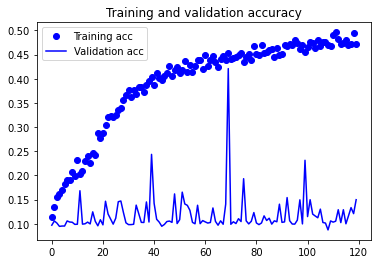

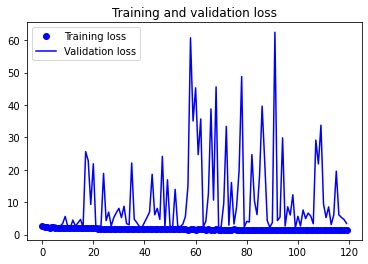

In [51]:
# Plot the data.

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
# Use the model to make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Save the model to the results folder
model.save('results/model-6-2-b.h5')
plt.savefig('results/validation-6-2-b.png')
np.savetxt('results/predictions-6-2-b.txt', predicted_labels, fmt='%d')
np.savetxt('results/metrics-6-2-b.txt', np.column_stack((loss_values, acc_values, val_loss_values, val_acc_values)), fmt='%f')

313/313 [==============================] - 8s 24ms/step


<Figure size 432x288 with 0 Axes>

## 6.3

In [54]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')
filepath = 'images'
output = []

# Loop over each image to make predictions
for file in os.listdir(filepath):
    image_path = os.path.join(filepath, file)
    img = image.load_img(image_path, target_size=(224, 224))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    # Make the predictions
    predictions = model.predict(x)
    prediction_name = str(image_path)
    info = str('Predicted: ' + str(decode_predictions(predictions, top=5)[0]))
    output.append(prediction_name)
    output.append(info)
    print(f'{prediction_name} \n {info}')

35363/35363 [==============================] - 0s 1us/step
images\amy-hirschi-szrJ3wjzOMg-unsplash.jpg 
 Predicted: [('n03291819', 'envelope', 0.21261807), ('n03642806', 'laptop', 0.08052259), ('n04118776', 'rule', 0.080337815), ('n03179701', 'desk', 0.07715189), ('n04548280', 'wall_clock', 0.07612319)]
1/1 [==============================] - 0s 117ms/step
images\daniel-bonilla-MVZlkv_G4zQ-unsplash.jpg 
 Predicted: [('n03803284', 'muzzle', 0.9223493), ('n02403003', 'ox', 0.031144816), ('n03868863', 'oxygen_mask', 0.0288808), ('n03424325', 'gasmask', 0.0042149327), ('n02092339', 'Weimaraner', 0.0014808961)]
1/1 [==============================] - 0s 103ms/step
images\dushawn-jovic-B3fgTrrgsiI-unsplash.jpg 
 Predicted: [('n02807133', 'bathing_cap', 0.4402964), ('n03710637', 'maillot', 0.17616081), ('n02892767', 'brassiere', 0.14404574), ('n03710721', 'maillot', 0.13406157), ('n02837789', 'bikini', 0.07064589)]
1/1 [==============================] - 0s 103ms/step
images\erik-mclean-ZRns2R5a

In [56]:
# Save predictions to a file
if not os.path.exists('results/predictions/resnet50'):
    os.makedirs('results/predictions/resnet50')
    
outfile = 'results/predictions/resnet50/predictions-6-3.txt'
with open(outfile, 'w') as f:
    for line in output:
        f.write("%s\n" % line)